In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/hitters-1-simple-linear-regression-dataset/Hitters1 - Sheet1.csv


#### x_w4_L6_ba_dip-iitm

# [Importing Libraries]

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Step #1: Data and prepare

In [3]:
df = pd.read_csv("../input/hitters-1-simple-linear-regression-dataset/Hitters1 - Sheet1.csv")

In [4]:
df.head()

,Price,Demand
0,3.0,6791
1,3.6,5988
2,40.0,354
3,21.0,651
4,4.0,7111


In [5]:
# mark the response variable (y) and the predictor(x)
X = df.iloc[:,0].values
y = df.iloc[:, 1].values
X, y

(array([ 3. ,  3.6, 40. , 21. ,  4. , 30. , 29. , 18. ,  9. ,  6. ,  5. ,
         8. , 15. , 32. , 20. , 10. , 17. ,  7. , 39. ,  4. , 35. , 39. ,
        44. , 40. , 25. ,  8. ,  5. ,  8. , 10. , 14. , 26. ]),
 array([6791, 5988,  354,  651, 7111,  406,  577,  655, 2891, 5589, 6707,
        4081, 2702,  370, 1251, 3140, 2469, 4909,  396, 7017,  484,  297,
         141,  193, 2801, 3731, 7444, 3910, 2678, 1833, 2946]))

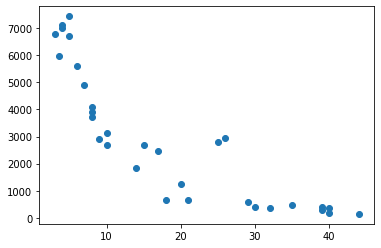

In [6]:
# check whether there is a linear pattern betwwen x and y
plt.scatter(X, y)

# Fitting a SLR model {slr: simple linear regression}

In [7]:
# reshape your data using array.reshape(-1, 1), if 
# your data has one feature
regressor = LinearRegression()
regressor.fit(X.reshape(-1, 1), y)

LinearRegression()

In [8]:
print(regressor.coef_)
print(regressor.intercept_)

[-157.70087387]
5842.836197653769


In [9]:
# get the r-squared value
y_pred = regressor.predict(X.reshape(-1, 1))
y_pred

array([ 5369.73357604,  5275.11305171,  -465.19875726,  2531.11784633,
        5212.03270216,  1111.80998147,  1269.51085534,  3004.22046794,
        4423.5283328 ,  4896.63095442,  5054.33182829,  4581.22920667,
        3477.32308956,   796.40823373,  2688.8187202 ,  4265.82745893,
        3161.92134182,  4738.93008054,  -307.49788338,  5212.03270216,
         323.30561211,  -307.49788338, -1096.00225275,  -465.19875726,
        1900.31435084,  4581.22920667,  5054.33182829,  4581.22920667,
        4265.82745893,  3635.02396344,  1742.61347696])

In [10]:
r2_score(y, y_pred)

0.7338976168337803

# Transforming data

In [11]:
y_new = np.sqrt(y)
y_new

array([82.40752393, 77.38216849, 18.81488772, 25.51470164, 84.32674546,
       20.14944168, 24.0208243 , 25.59296778, 53.76802024, 74.75961477,
       81.89627586, 63.88270501, 51.98076567, 19.23538406, 35.36947837,
       56.0357029 , 49.689033  , 70.06425622, 19.89974874, 83.76753548,
       22.        , 17.23368794, 11.87434209, 13.89244399, 52.92447449,
       61.08191222, 86.27861844, 62.5299928 , 51.74939613, 42.81354926,
       54.27706698])

In [12]:
regressor1 = LinearRegression()
regressor1.fit(X.reshape(-1,1), y_new)

print(regressor1.coef_)
print(regressor1.intercept_)
print("\n")

y_pred1 = regressor1.predict(X.reshape(-1, 1))
print(y_pred1)
print("\n")
print("r2_score:", r2_score(y_new, y_pred1))

[-1.68932556]
79.54515270075692


[74.47717601 73.46358068 11.97213021 44.06931589 72.78785045 28.86538583
 30.5547114  49.13729258 64.34122264 69.40919933 71.09852489 66.0305482
 54.20526927 25.48673471 45.75864146 62.65189708 50.82661814 67.71987377
 13.66145577 72.78785045 20.41875802 13.66145577  5.21482796 11.97213021
 37.31201364 66.0305482  71.09852489 66.0305482  62.65189708 55.89459483
 35.62268808]


r2_score: 0.8308606126447352


# train_test_split

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X.reshape(-1,1), y, test_size=.2, random_state=0)

In [15]:
model_fit = LinearRegression()
model_fit.fit(X_train, y_train)

LinearRegression()

In [16]:
y_pred = model_fit.predict(X_test)
y_pred

array([ -742.14288397,  3682.24033676,   619.20579933,  5213.75760547,
        4703.25184923,  4703.25184923, -1422.81722563])

In [17]:
r2_score(y_test, y_pred)

0.6990175696186043